# subject : IEEE-CIS Fraud Detection Modeling 

<font size="5">[kaggle](https://www.kaggle.com/competitions/ieee-fraud-detection/overview/description)</font>

<font size="5">workflow</font> <br>
분석 문제 정의 → 데이터 수집 → EDA&Data Preprocessing → feature engineering → Model selection (XGBoost,LightGBM), 둘 중 더 좋은 성능으로 -> undersampling vs non undersampling, Confusion matrix 비교 → GridSearchCV(최적의 하이퍼파라미터를 찾아줌)


## Data Preprocessing(전처리)

- [ ] **결측치 처리** : 보통 결측치가 10% 미만이거나 많게는 20% 정도일 때 삭제, 혹은 빈도 수가 가장 높은 데이터로 대치한다고 합니다. 그러나 이는 데이터가 왜곡될 위험이 있기도 하고, 결측치가 20% 이상인 경우에는 별로 권장하지 않습니다.
    1. 행 또는 열 삭제
    2. **중앙값, 평균값**으로 대체
    3. XGboost / LightGBM
    4. K-NN
    5. MICE (Multivariate Imputation by Chained Equation)
    6. 딥러닝 이용

<font size="4">**train_final(knn).csv & test_final(knn).csv**</font>
- [x] Vxxx column **PCA** <br>why?🤷🏻‍♀️ 컬럼 수가 339개로 많아 KNNImputer 진행하기에는 시간이 많이 소요되어 PCA진행
    - scaling : minmax_scale
    - n_components : 30
    
    
- [x] Categorical Encoding <br>why?🤷🏻‍♀️ 텍스트로 이루어진 개별 범주형 변수를 수치형 변수 변환하여 연산하기 위해
    - **label encoding**(알파벳 오더순으로 숫자를 할당)
    
        
- [ ] ~~KNNImputer( 가까운 이웃의 수를 정하고 그 이웃들을 이용하여 결측치를 채우는 방식) =>   <br>why?🤷🏻‍♀️ 마스킹 데이터가 많아 결측치(전체 데이터의 40%이상 null값)를 채우기 어려움이 있어 KNNImputer사용~~**클러스터링용!!**
    - n_neighbors: 5(하이퍼파라미터)
    
    

<font size="4">**train & test**</font>    
- [ ] 날짜 데이터 추가(`TransactionDT` null값 없음 -> KNNImputer 뒤 적용 가능)
    - START_DATE='2017-12-01'을 기준으로 `TransactionDT` 컬럼에 적용하여 `date`, `weekdays`, `hours`, `days` 컬럼 생성 후 'TransactionDT' 컬럼 drop

 
## feature engineering
[AMEX-Data Preprocesing & Feature Engineering](https://www.kaggle.com/code/susnato/amex-data-preprocesing-feature-engineering)


1. [ ] feature importance (차원축소를 하기위해 ML을 돌림)
    1. **LGBM**
    2. 👍🏻[모델이 학습하면서 feature 선택](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)


## Model selection (train = 8:2로 진행, random states = 0xC0FFEE)
   - Kfold 사용 후 모델링 진행하여 오버피팅 방지하고 모델 성능 평가
   - **XGBoost**, LGBM, Catboost 
    
- [ ] **overfitting check : kflod**
- [ ] **undersampling check : Confusion matrix**
- [ ] **hyper-parameter tuning : gridsearchCV**


(전체)데이터 특성에 맞는 모델을 찾고 -> 하이퍼파라미터 튜닝! -> 마지막에 그리드서치로 최적의 파라미터 찾아준다! => 최대한 다양한 모델을 아는것이 중요


**Evaluation**
- ROC curve
- TransactionID(PK) 
- isFraud (**Target, 사기 거래일 확률 예측**)

## 추가! 성능을 높이기 위해 해야할 일!

1. [ ] feature importance ->  feature 수정해보면서 성능비교
2. [ ] undersampling -> 성능비교
3. [ ] **Confusion matrix (undersampling 전 vs undersmpling 후)비교해보기**
    - 01-naive_bayes & 09-classification-실습 :  이재원강사님 자료 참고
4. [ ] hyper-parameter tuning: gridsearchCV(마지막) or KFold(CV) partial : optuna를 사용하기 위함
    - 👍🏻Chapter.06 실전 머신러닝 프로젝트_Mercedes-Benz : 김용담강사님 자료 참고
    - 최적의 모델을 찾을때 -> 보통 모델 학습 시 train과 validation을 나눠 train학습 후 validation으로 검증함<br>
        - kflod, pipeline, optuna => 전체 데이터 값인지, validation을 나눈 뒤 train 값인지 궁금, validation을 나눈 뒤 trian값을 넣는다고 생각해도 validation으로 검증을 하지 않는 것 같기도 함 -> 뭐가 맞지? 🤷🏻‍♀️

**feedback**
- 이모델에서 뭐가 좋을지...?

- 각자 코드 공유, predicted의 확률 이용해서 앙상블

- 각자의 모델에서 합치는 방법은 **앙상블(hard, soft voting)**사용!

- 구현 : Django말고 flask, fastAPI

**전체 dataframe 확인하기**
```
pd.options.display.max_rows = 500
pd.options.display.max_columns = 2
용량 많이 차지함
```

# 필요한 라이브러리 & 데이터 불러오기

In [1]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# 모델들, 성능 평가
# (저는 일반적으로 정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋습니다.)
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import sklearn 
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna

import os
import gc
print(os.listdir("/Users/goeun/Documents/YearDream/MiniProJect/6월_ML/ieee-fraud-detection(git)/mini_pjt_modeling/project/data/extracted/"))

['JH_submission(0.89).csv', 'train_labelencoding.csv', '.DS_Store', 'test_labelencoding.csv', 'README.md']


In [2]:
base_path = '/Users/goeun/Documents/YearDream/MiniProJect/6월_ML/ieee-fraud-detection(git)/mini_pjt_modeling/project/data/extracted/'
base_path2 = '/Users/goeun/Documents/YearDream/MiniProJect/6월_ML/ieee-fraud-detection(git)/mini_pjt_modeling/project/data/raw/'

train = pd.read_csv(base_path2 +'train.csv')
test = pd.read_csv(base_path2 +'test.csv')

submission = pd.read_csv(base_path2 + 'sample_submission.csv')

In [3]:
test.columns = [col.replace('-','_')for col in test.columns]   

In [4]:
# flag setting

feature_reducing = "feature_importance" # "correlation" / "feature_importance" / "PCA"

In [5]:
# shape 확인
train.shape, test.shape, submission.shape

((590540, 434), (506691, 433), (506691, 2))

In [6]:
# total cells
np.product(train.shape),np.product(test.shape), np.product(submission.shape)

(256294360, 219397203, 1013382)

### train & test  확인

In [5]:
# print(train.info(verbose=True, null_counts=True))

display(train.head(2))
display(train.tail(2))

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
display(test.head(2))
display(test.tail(2))

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506690,4170239,34214345,24.346,C,5713,168.0,144.0,visa,147.0,credit,...,samsung browser 8.2,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG


In [6]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
# TransactionAmt, card, emaildomain, V

In [9]:
## REducing memory
# train = reduce_mem_usage(train)
# test = reduce_mem_usage(test)

In [10]:
resumetable(train)[:5]

Dataset Shape: (590540, 434)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,TransactionID,int64,0,590540,2987000,2987001,2987002,19.17
1,isFraud,int64,0,2,0,0,0,0.22
2,TransactionDT,int64,0,573349,86400,86401,86469,19.11
3,TransactionAmt,float64,0,20902,68.5,29.0,59.0,8.35
4,ProductCD,object,0,5,W,W,W,1.28


In [11]:
resumetable(test)[:5]

Dataset Shape: (506691, 433)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,TransactionID,int64,0,506691,3663549,3663550,3663551,18.95
1,TransactionDT,int64,0,494686,18403224,18403263,18403310,18.90
2,TransactionAmt,float64,0,14119,31.95,49.0,171.0,8.08
3,ProductCD,object,0,5,W,W,W,1.37
4,card1,int64,0,13244,10409,4272,4476,9.95


In [12]:
# train.info(verbose=True, null_counts=True)
# test.info(verbose=True, null_counts=True) 

### isFraud(traget)

In [7]:
train.isFraud.isna().sum()

0

0    569877
1     20663
Name: isFraud, dtype: int64


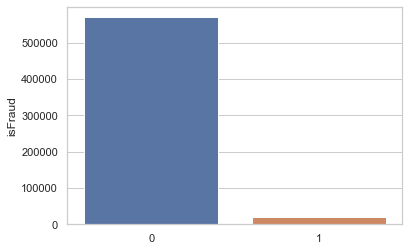

In [8]:
print(train.isFraud.value_counts())

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x = train.isFraud.value_counts().index, y = train.isFraud.value_counts(), data=train)

traget의 편차가 큼(타켓 불균형) -> **undersampling vs non-undersampling  성능 비교**

# some feature engineering(new columns)

In [7]:
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('mean')

test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('mean')

train['id_02_to_mean_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_mean_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')

test['id_02_to_mean_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
test['id_02_to_mean_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')

train['D15_to_mean_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_mean_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')

test['D15_to_mean_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_mean_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')

train['D15_to_mean_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
train['D15_to_mean_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')

test['D15_to_mean_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
test['D15_to_mean_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')

In [8]:
train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)

In [9]:
train.shape, test.shape

((590540, 445), (506691, 444))

In [65]:
# # train.describe().iloc[:, 400:]
# test.describe().iloc[:,400:]

# missing value (컬럼drop(null_80%이상)) 



<font size="4.5">EDA -> 나중에 통합 데이터[캐글 참고](https://www.kaggle.com/code/kabure/extensive-eda-and-modeling-xgb-hyperopt)</font>
 

- nunique == 1 drop
-  train.columns[(train.isna().sum() / len(train) > 0.2)]

**\[결측치 채우는 방법\]**

1. 행 또는 열 삭제
2. **중앙값, 평균값**으로 대체
3. XGboost / LightGBM
4. K-NN
5. MICE (Multivariate Imputation by Chained Equation)
6. 딥러닝 이용

In [193]:
test.nunique()[test.nunique() ==1]

V107    1
dtype: int64

In [12]:
test.drop(['V107'], axis = 1, inplace=True)

In [13]:
def mypreprocess(df) :
    dff_column_to_drop = df.columns[(df.isna().sum() / len(df) > 0.2)]
    df = df.drop(columns=dff_column_to_drop).copy()   # 20% 이상의 결측치를 가지는 컬럼도 drop
    print( f'{df}', df.shape )
    return df

In [14]:
train = mypreprocess(train)
test = mypreprocess(test)

        TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ...   V318        V319  \
0       13926    NaN  150

In [70]:
print(train.shape,  test.shape)
print()
train.info()
print()
test.info()

(590540, 188) (506691, 207)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 188 entries, TransactionID to P_emaildomain_2
dtypes: float64(178), int64(4), object(6)
memory usage: 847.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 207 entries, TransactionID to P_emaildomain_2
dtypes: float64(198), int64(3), object(6)
memory usage: 800.2+ MB


In [25]:
# print(train.isna().sum().index.tolist())
# print()
# print(test.isna().sum().index.tolist())

In [15]:
train_missing = train.isna().sum()
print("% of total missing data = ",(train_missing.sum()/np.product(train.shape))*100)

% of total missing data =  5.44347528299018


In [16]:
test_missing = test.isna().sum()
print("% of total missing data = ",(test_missing.sum()/np.product(test.shape))*100)

% of total missing data =  2.7957066936058763


In [73]:
len(train.isna().sum()[train.isna().sum() > 0].index.tolist())

167

In [74]:
len(test.isna().sum()[test.isna().sum() > 0].index.tolist())

159

# feature engineering

- some feature engineering(new columns)
- LABEL  encoding
- Vxxx-> pca

In [197]:
train.shape, test.shape

((590540, 188), (506691, 207))

### TransactionDT  새로운 컬럼 생성



In [17]:
import datetime

def date(df):
    START_DATE = '2017-12-01'
    startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
    df["date"] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
    df['weekdays'] = df['date'].dt.dayofweek
    df['hours'] = df['date'].dt.hour
    df['days'] = df['date'].dt.day
    df.drop(['date','TransactionDT'],axis = 1, inplace = True)
    return df

In [18]:
train = date(train)
test = date(test)

In [19]:
train.shape, test.shape

((590540, 190), (506691, 209))

### LABEL  encoding

In [20]:
from sklearn import preprocessing

def labelencoding(df):
    for f in df.columns:
        if df[f].dtype=='object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df[f].values))
            df[f] = lbl.transform(list(df[f].values))
    return df

In [21]:
display(labelencoding(train)[:2])
display(labelencoding(test)[:2])

train.info()
print()
test.info()
print(f'train.shape :{train.shape}, test.shape: {test.shape}')

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V321,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,D15_to_mean_card1,D15_to_mean_card4,P_emaildomain_1,P_emaildomain_2,weekdays,hours,days
0,2987000,0,68.5,4,13926,NaN,150.0,1,142.0,1,...,0.0,0.194640,0.257761,0.0,0.0,25,8,5,0,2
1,2987001,0,29.0,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.123777,0.219054,0.0,0.0,15,1,5,0,2


,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,TransactionAmt_to_mean_card4,D15_to_mean_card1,D15_to_mean_card4,D15_to_mean_addr1,D15_to_mean_addr2,P_emaildomain_1,P_emaildomain_2,weekdays,hours,days
0,3663549,31.95,4,10409,111.0,150.0,4,226.0,2,170.0,...,0.237290,1.066067,1.925444,1.557394,1.760048,15,1,0,0,2
1,3663550,49.00,4,4272,111.0,150.0,4,226.0,2,299.0,...,0.363919,2.155230,2.984674,3.033737,2.728290,2,1,0,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 190 entries, TransactionID to days
dtypes: float64(178), int64(12)
memory usage: 856.0 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 209 entries, TransactionID to days
dtypes: float64(198), int64(11)
memory usage: 807.9 MB
train.shape :(590540, 190), test.shape: (506691, 209)


### [ver1]용 null값 채우기

In [81]:
def missingvalue(df):
    df_null = df.loc[:, df.isnull().any()].columns  # 결측치가 있는 컬럼을 골라서 리스트에 넣기
    for aa in df_null:
        df[aa] = df[aa].fillna(df[aa].median())  # 중앙값으로 채워 넣기
    # train_df.info(verbose=True, show_counts=True)

    print("Null :", df.isnull().sum().sum() )
    return df

In [82]:
missingvalue(train)
missingvalue(test)

Null : 0
Null : 0


,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,TransactionAmt_to_mean_card4,D15_to_mean_card1,D15_to_mean_card4,D15_to_mean_addr1,D15_to_mean_addr2,P_emaildomain_1,P_emaildomain_2,weekdays,hours,days
0,3663549,31.950,4,10409,111.0,150.0,4,226.0,2,170.0,...,0.237290,1.066067,1.925444,1.557394,1.760048,15,1,0,0,2
1,3663550,49.000,4,4272,111.0,150.0,4,226.0,2,299.0,...,0.363919,2.155230,2.984674,3.033737,2.728290,2,1,0,0,2
2,3663551,171.000,4,4476,574.0,150.0,4,226.0,2,472.0,...,1.270002,0.279881,0.456646,0.457103,0.417420,17,1,0,0,2
3,3663552,284.950,4,10989,360.0,150.0,4,166.0,2,205.0,...,2.116298,1.578683,1.139260,1.020278,1.041398,15,1,0,0,2
4,3663553,67.950,4,18018,452.0,150.0,2,117.0,2,264.0,...,0.517674,0.085873,0.109654,0.098978,0.094673,15,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,94.679,0,13832,375.0,185.0,2,224.0,2,284.0,...,0.721308,0.000000,0.000000,0.000000,0.000000,15,1,0,23,31
506687,4170236,12.173,0,3154,408.0,185.0,2,224.0,2,299.0,...,0.092739,0.243530,0.079748,0.386224,0.387297,17,1,0,23,31
506688,4170237,49.000,4,16661,490.0,150.0,4,226.0,2,327.0,...,0.363919,0.000000,0.000000,0.000000,0.000000,17,1,0,23,31
506689,4170238,202.000,4,16621,516.0,150.0,2,224.0,2,177.0,...,1.538928,0.000000,0.000000,0.000000,0.000000,17,1,0,23,31


###  feature importance
#### ver1.  Vxxx PCA Train3, Test3
Vxxx PCA : 100차원

In [91]:
# medidan_list = [test[col].median() for col in  test.loc[:, test.isnull().any()].columns]
# medidan_list

In [89]:
# test.describe().iloc[:,189:]

In [94]:
train.shape, test.shape

((590540, 190), (506691, 209))

In [95]:
def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)
    principalComponents = pca.fit_transform(df[cols])
    principalDf = pd.DataFrame(principalComponents)
    df.drop(cols, axis=1, inplace=True)
    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)
    df = pd.concat([df, principalDf], axis=1)
    return df, pca

In [96]:
train3 = train.copy()
test3 = test.copy()

In [97]:
v_cols = [v for v in train3 if v[0] == 'V']
v_cols_test = [v for v in test3 if v[0] == 'V']

In [98]:
mas_v = train3[v_cols].columns
mas_v_test = test3[v_cols_test].columns

In [99]:
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA

for col in mas_v:
    train3[col] = train3[col].fillna((train3[col].min() - 2))
    train3[col] = (minmax_scale(train3[col], feature_range=(0,1)))
    
train3, pca = PCA_change(train3, mas_v, prefix='PCA_V_', n_components=100) # 100차원으로 축소

In [127]:
train3.drop(['TransactionID'],axis = 1, inplace=True)

In [105]:
# train3.columns.tolist()

In [101]:
np.sum(pca.explained_variance_ratio_)

0.999124524417838

In [102]:
for col in mas_v_test:
    test3[col] = test3[col].fillna((test3[col].min() - 2))
    test3[col] = (minmax_scale(test3[col], feature_range=(0,1)))
    
test3, pca = PCA_change(test3, mas_v_test, prefix='PCA_V_', n_components=100) # 30차원으로 축소

In [103]:
np.sum(pca.explained_variance_ratio_)

0.9978805524686775

In [125]:
test3 = test3[['TransactionAmt','ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','D1','D10','D15','TransactionAmt_to_mean_card1','TransactionAmt_to_mean_card4','D15_to_mean_card1','D15_to_mean_card4','P_emaildomain_1','P_emaildomain_2','weekdays','hours','days','PCA_V_0','PCA_V_1','PCA_V_2','PCA_V_3','PCA_V_4','PCA_V_5','PCA_V_6','PCA_V_7','PCA_V_8','PCA_V_9','PCA_V_10','PCA_V_11','PCA_V_12','PCA_V_13','PCA_V_14','PCA_V_15','PCA_V_16','PCA_V_17','PCA_V_18','PCA_V_19','PCA_V_20','PCA_V_21','PCA_V_22','PCA_V_23','PCA_V_24','PCA_V_25','PCA_V_26','PCA_V_27','PCA_V_28','PCA_V_29','PCA_V_30','PCA_V_31','PCA_V_32','PCA_V_33','PCA_V_34','PCA_V_35','PCA_V_36','PCA_V_37','PCA_V_38','PCA_V_39','PCA_V_40','PCA_V_41','PCA_V_42','PCA_V_43','PCA_V_44','PCA_V_45','PCA_V_46','PCA_V_47','PCA_V_48','PCA_V_49','PCA_V_50','PCA_V_51','PCA_V_52','PCA_V_53','PCA_V_54','PCA_V_55','PCA_V_56','PCA_V_57','PCA_V_58','PCA_V_59','PCA_V_60','PCA_V_61','PCA_V_62','PCA_V_63','PCA_V_64','PCA_V_65','PCA_V_66','PCA_V_67','PCA_V_68','PCA_V_69','PCA_V_70','PCA_V_71','PCA_V_72','PCA_V_73','PCA_V_74','PCA_V_75','PCA_V_76','PCA_V_77','PCA_V_78','PCA_V_79','PCA_V_80','PCA_V_81','PCA_V_82','PCA_V_83','PCA_V_84','PCA_V_85','PCA_V_86','PCA_V_87','PCA_V_88','PCA_V_89','PCA_V_90','PCA_V_91','PCA_V_92','PCA_V_93','PCA_V_94','PCA_V_95','PCA_V_96','PCA_V_97','PCA_V_98','PCA_V_99']]

In [272]:
train3.shape, test3.shape

((590540, 138), (506691, 137))

<font size="5">modeling go!!</font>

---

#### ver2. LGBM fit  Train2, Test2



**[방법1](https://www.kaggle.com/code/pnprabakaran/feature-selection-before-hand-lightgbm/notebook)**

In [93]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

y = train['isFraud']
train2 = train.copy()
train2 = train2.drop(['TransactionID'],axis = 1)

In [251]:
#lightGBM model fit
gbm = lgb.LGBMRegressor()

gbm.fit(train2, y)
gbm.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':train2.columns, 'fea_imp':gbm.feature_importances_})
top19 = fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

In [252]:
top19.cols.values

array(['TransactionAmt', 'isFraud', 'card1', 'card2', 'addr1', 'card3',
       'D1', 'C1', 'C2', 'card5', 'D10', 'C4', 'C6', 'C5', 'D15', 'C7',
       'C11', 'C13', 'C14'], dtype=object)

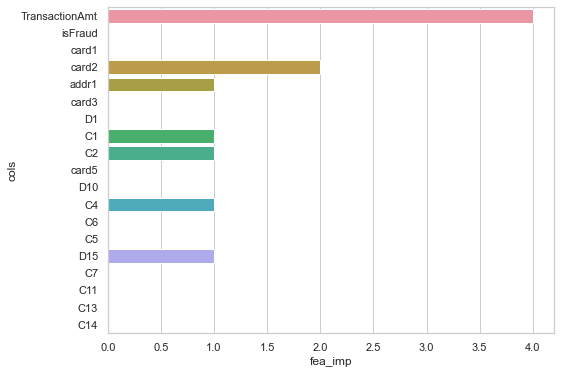

In [253]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x =top19.fea_imp.value_counts().sort_values(), y = top19.cols, data=top19, orient='h')

In [268]:
# TransactionAmt drop X!!
train2 = train2[['TransactionAmt', 'isFraud', 'card1', 'card2', 'addr1', 'card3',
       'D1', 'C1', 'C2', 'card5', 'D10', 'C4', 'C6', 'C5', 'D15', 'C7',
       'C11', 'C13', 'C14']]

# TransactionAmt drop X!!
test2 = test[['TransactionAmt', 'card1', 'card2', 'addr1', 'card3',
       'D1', 'C1', 'C2', 'card5', 'D10', 'C4', 'C6', 'C5', 'D15', 'C7',
       'C11', 'C13', 'C14']]

In [118]:
# train2.shape, test2.shape

#### ver3. XGBM fit Train4, Test4

**[방법1](https://mljar.com/blog/feature-importance-xgboost/#:~:text=Xgboost%20is%20a%20gradient%20boosting,%2C%20R%2C%20Julia%2C%20Scala.)**

In [22]:
train4 = train.copy()
test4 = test.copy()

In [23]:
train4.shape, test4.shape

((590540, 190), (506691, 209))

In [24]:
train4.drop(['TransactionID'],axis = 1, inplace=True)

In [25]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

X = train4.drop(['isFraud'], axis = 1)
X_test = test4
y = train4['isFraud'].values

# 학습 데이터 분할 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=0xC0FFEE)

In [26]:
xgbs = xgb.XGBClassifier(n_estimators=100)
xgbs.fit(X_train, y_train)

[18:49:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [312]:
# xgbs.feature_importances_

In [27]:
fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':xgbs.feature_importances_})
positive = fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

In [28]:
positive.cols.tolist()

['C7',
 'V91',
 'V70',
 'C14',
 'C1',
 'C12',
 'V102',
 'C4',
 'V317',
 'addr2',
 'V283',
 'C8',
 'C13',
 'V294',
 'V318',
 'V296',
 'V308',
 'V80',
 'V87',
 'V79',
 'card6',
 'V72',
 'V281',
 'V62',
 'V291',
 'V312',
 'C5',
 'card3',
 'V279',
 'V94',
 'V76',
 'C11',
 'ProductCD',
 'V315',
 'C2',
 'V86',
 'V54',
 'V121',
 'D1',
 'V74',
 'V293',
 'V12',
 'P_emaildomain',
 'V53',
 'V20',
 'V112',
 'V25',
 'C10',
 'V133',
 'V83',
 'V298',
 'V30',
 'V67',
 'V105',
 'V115',
 'V55',
 'V282',
 'V81',
 'V17',
 'C6',
 'D10',
 'C3',
 'C9',
 'V73',
 'TransactionAmt',
 'V56',
 'V280',
 'addr1',
 'V285',
 'V61',
 'card2',
 'D15_to_mean_card1',
 'V313',
 'V131',
 'V290',
 'V126',
 'card1',
 'D15',
 'V63',
 'V310',
 'V82',
 'V99',
 'V13',
 'TransactionAmt_to_mean_card4',
 'V77',
 'V98',
 'D15_to_mean_card4',
 'V64',
 'V314',
 'V320',
 'card5',
 'V301',
 'P_emaildomain_2',
 'TransactionAmt_to_mean_card1',
 'V135',
 'V26',
 'V19',
 'V137',
 'V78',
 'V108',
 'V302',
 'card4',
 'V130',
 'V127',
 'V307',


In [29]:
train4 = train4[['isFraud','C7','V91','V70','C14','C1','C12','V102','C4','V317','addr2','V283','C8','C13','V294','V318','V296','V308','V80','V87','V79','card6','V72','V281','V62','V291','V312','C5','card3','V279','V94','V76','C11','ProductCD','V315','C2','V86','V54','V121','D1','V74','V293','V12','P_emaildomain','V53','V20','V112','V25','C10','V133','V83','V298','V30','V67','V105','V115','V55','V282','V81','V17','C6','D10','C3','C9','V73','TransactionAmt','V56','V280','addr1','V285','V61','card2','D15_to_mean_card1','V313','V131','V290','V126','card1','D15','V63','V310','V82','V99','V13','TransactionAmt_to_mean_card4','V77','V98','D15_to_mean_card4','V64','V314','V320','card5','V301','P_emaildomain_2','TransactionAmt_to_mean_card1','V135','V26','V19','V137','V78','V108','V302','card4','V130','V127','V307','V109','V101','V23','V75','V33','V136','V21','V111','V321','V18','V85','V128','V66','hours','V124','V309','V58','V59','V134','V69','V93','V288','V303','days','V292','V319','V92','V311','V15','V289','V29','V96','V316','V24','V287','V16','V90','V60','V122','V129','V306','V284','V57','V125','V103','V300','V84','V295','V34','weekdays','V95','V32','V304','V123','V132','V113','V118','V97','V297','V110','V31']]

In [30]:
test4 = test4[['C7','V91','V70','C14','C1','C12','V102','C4','V317','addr2','V283','C8','C13','V294','V318','V296','V308','V80','V87','V79','card6','V72','V281','V62','V291','V312','C5','card3','V279','V94','V76','C11','ProductCD','V315','C2','V86','V54','V121','D1','V74','V293','V12','P_emaildomain','V53','V20','V112','V25','C10','V133','V83','V298','V30','V67','V105','V115','V55','V282','V81','V17','C6','D10','C3','C9','V73','TransactionAmt','V56','V280','addr1','V285','V61','card2','D15_to_mean_card1','V313','V131','V290','V126','card1','D15','V63','V310','V82','V99','V13','TransactionAmt_to_mean_card4','V77','V98','D15_to_mean_card4','V64','V314','V320','card5','V301','P_emaildomain_2','TransactionAmt_to_mean_card1','V135','V26','V19','V137','V78','V108','V302','card4','V130','V127','V307','V109','V101','V23','V75','V33','V136','V21','V111','V321','V18','V85','V128','V66','hours','V124','V309','V58','V59','V134','V69','V93','V288','V303','days','V292','V319','V92','V311','V15','V289','V29','V96','V316','V24','V287','V16','V90','V60','V122','V129','V306','V284','V57','V125','V103','V300','V84','V295','V34','weekdays','V95','V32','V304','V123','V132','V113','V118','V97','V297','V110','V31']]

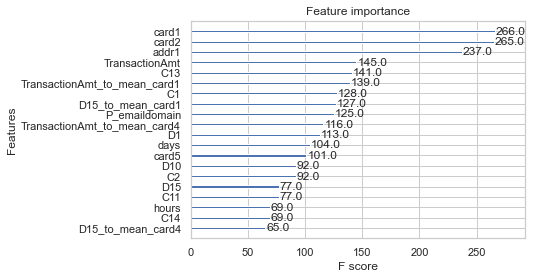

In [313]:
plot_importance(xgbs, max_num_features=20)
plt.show()

In [315]:
train4 = train4[['isFraud','card1', 'card2', 'addr1', 'TransactionAmt','C13','TransactionAmt_to_mean_card1','C1','D15_to_mean_card1', 'P_emaildomain', 'TransactionAmt_to_mean_card4','D1','days','card5','D10','C2','D15','C11','hours','C14','D15_to_mean_card4']]

In [316]:
test4 = test4[['card1', 'card2', 'addr1', 'TransactionAmt','C13','TransactionAmt_to_mean_card1','C1','D15_to_mean_card1', 'P_emaildomain', 'TransactionAmt_to_mean_card4','D1','days','card5','D10','C2','D15','C11','hours','C14','D15_to_mean_card4']]

In [317]:
train4.shape, test4.shape

((590540, 21), (506691, 20))

## 학습 데이터 분할 및 평가

In [31]:
train4.shape, test4.shape

((590540, 167), (506691, 166))

In [32]:
from sklearn.model_selection import train_test_split

X = train4.drop(['isFraud'], axis = 1)
X_test = test4
y = train4['isFraud'].values

# 학습 데이터 분할 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=0xC0FFEE)

In [33]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((472432, 166), (118108, 166), (472432,), (118108,))

## Modeling
### XGBoost 학습 및 평가(ROC)

In [34]:
# 성능 평가
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import warnings
import xgboost as xgb

print(f'xgboost=={xgb.__version__}')

xgboost==1.5.0


In [35]:
xgb_clf = xgb.XGBClassifier(
    n_estimators = 500,
    max_depth = 6,
    booster = 'gbtree',
    eta = 0.1,
    gamma = 0,    
    silent = 0,
    objective = 'binary:logistic',
    nthread = 4,
    base_score = 0.5,
    eval_metric='auc'
)

xgb_clf.fit(X_train, y_train, eval_set=[(X_validation, y_validation)], early_stopping_rounds=15,verbose=100)
y_pred_xgb = xgb_clf.predict_proba(X_validation)[:,1]
roc_auc_score(y_validation, y_pred_xgb)

[19:42:56] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.78836
[100]	validation_0-auc:0.91467
[200]	validation_0-auc:0.92837
[300]	validation_0-auc:0.93673
[400]	validation_0-auc:0.94273
[499]	validation_0-auc:0.94704


0.9471306114319145

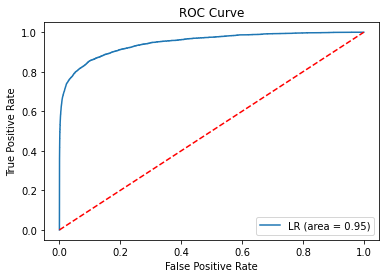

In [36]:
fpr,tpr,threshold = roc_curve(y_validation, y_pred_xgb)
roc_auc = roc_auc_score(y_validation, y_pred_xgb)
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [38]:
# (n_estimators, train accuracy, test accuracy)
performances = []
for n_estimators in range(10, 501, 10):
    y_pred_train_xgb = xgb_clf.predict_proba(X_train, ntree_limit=n_estimators)[:, 1]
    y_pred_test_xgb = xgb_clf.predict_proba(X_validation, ntree_limit=n_estimators)[:, 1]
    train_accuracy = roc_auc_score( y_train, y_pred_train_xgb)
    test_accuracy = roc_auc_score(y_validation , y_pred_test_xgb)
    performances.append((n_estimators, train_accuracy, test_accuracy))

In [39]:
# 오버피팅 확인
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.layouts import gridplot

output_notebook()

n_estimators, train_accuracy, test_accuracy = zip(*performances)
p = figure(plot_width=800, plot_height=400, title='Accuracy by n_estimators (XGB)')
p.line(n_estimators, train_accuracy, line_width=2, line_color='orange', legend_label='Train')
p.line(n_estimators, test_accuracy, line_width=2, line_color='blue', legend_label='Test')
p.xaxis.axis_label = 'nestimators'
p.yaxis.axis_label = 'roc'
show(p)

Loading BokehJS ...

Trees 의 개수와 정확도의 플랏을 그려보면 train 데이터에 대한 정확도와 test 데이터에 대한 정확도와 같이 올라감<br>
-> **overfitting은 없음** <br>
- test 데이터가 올라감! -> 학습 더 시켜줘! -> 성능이 올라갈 수 있다!  <br>
    - 방법은? [callback 함수 추가](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor.fit)

### confusion_matrix(오차행렬)
<font size="5">평가 결과의 해석</font> <br>
정상을 positive, 불량을 negative라고 정의하고, 맞출 경우를 True, 틀릴 경우를 False라고 한다면 다음과 같은 confusion matrix가 생성됨
 
 
 <img src="https://www.researchgate.net/profile/Nimmisha-Shajihan/publication/347447352/figure/fig3/AS:970048604741634@1608289018974/Performance-measurement-TP-TN-FP-FN-are-the-parameters-used-in-the-evaluation-of.jpg" width="600" style="float:left" />

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_validation, xgb_clf.predict(X_validation))

array([[113659,    176],
       [  2146,   2127]])

### F1 score

In [41]:
from sklearn.metrics import f1_score
evaluation_metric = f1_score

In [42]:
print("Prediction")
pred_train = xgb_clf.predict(X_train)
pred_test = xgb_clf.predict(X_validation)

train_score = evaluation_metric(y_train, pred_train)
test_score = evaluation_metric(y_validation, pred_test)


print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)

Prediction
Train Score : 0.7205
Test Score : 0.6469


### 제출

In [43]:
X_test.shape, submission.shape

((506691, 166), (506691, 2))

In [44]:
prediction = xgb_clf.predict_proba(X_test)[:,1]

In [45]:
submission['isFraud'] = 0
submission['isFraud'] = np.round(prediction,4)
submission

,TransactionID,isFraud
0,3663549,0.0023
1,3663550,0.0066
2,3663551,0.0023
3,3663552,0.0021
4,3663553,0.0035
...,...,...
506686,4170235,0.0185
506687,4170236,0.0105
506688,4170237,0.0095
506689,4170238,0.0092


In [46]:
submission_df = pd.DataFrame({'TransactionID':submission.TransactionID
                           ,'isFraud':submission.isFraud})

In [47]:
# 파일 제출
submission_df.reset_index(drop=True).to_csv('xgbm_submission_fi(xgb_166).csv', index=False)

### oversampling

> **undersampling**<br>
언더 샘플링은 불균형한 데이터 셋에서 높은 비율을 차지하던 클래스의 데이터 수를 줄임으로써 데이터 불균형을 해소하는 아이디어 입니다. <br>
하지만 이 방법은 학습에 사용되는 전체 데이터 수를 급격하게 감소시켜 오히려 성능이 떨어질 수 있습니다.

 
> **oversampling**<br>
오버 샘플링은 낮은 비율 클래스의 데이터 수를 늘림으로써 데이터 불균형을 해소하는 아이디어 입니다.<br>
이 방법이 가능하다면 언더 샘플링보다 훨씬 좋은 해결책이 될 수 있을것 같은데,
문제는 "어떻게" 없던 데이터를 생성하느냐 입니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F2yuj6%2FbtqGirRpGhD%2FhmIPmKkQ6WMJ0PbpZZ5Wk0%2Fimg.png' width="600" style="float:left" />

In [169]:
# 샘플데이터 1000 Fraud and 1000 Non Fraud sampled_train 저장
sampled_train = pd.concat([train3.loc[train3['isFraud'] == 0 ].sample(2000),
                         train3.loc[train3['isFraud'] == 1].sample(2000)])

In [170]:
sampled_train.shape

(4000, 138)

## oversampling 학습 데이터 분할 및 평가

In [171]:
from sklearn.model_selection import train_test_split

X = sampled_train.drop(['isFraud'], axis = 1)
X_test = test3
y = sampled_train['isFraud'].values

# 학습 데이터 분할
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=0xC0FFEE)

In [172]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((3200, 137), (800, 137), (3200,), (800,))

# Modeling
### XGBoost 학습 및 평가

In [173]:
xgb_clf = xgb.XGBClassifier(
    n_estimators = 500,
    max_depth = 6,
    booster = 'gbtree',
    eta = 0.1,
    gamma = 0,    
    silent = 0,
    objective = 'binary:logistic',
    nthread = 4,
    base_score = 0.5,
    eval_metric='auc'
)

xgb_clf.fit(X_train, y_train, eval_set=[(X_validation, y_validation)], early_stopping_rounds=15,verbose=50)
y_pred_xgb = xgb_clf.predict_proba(X_validation)[:,1]
roc_auc_score(y_validation, y_pred_xgb)

[19:50:48] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82818
[50]	validation_0-auc:0.88150
[100]	validation_0-auc:0.88729
[150]	validation_0-auc:0.88789
[154]	validation_0-auc:0.88779


0.8887951242381622

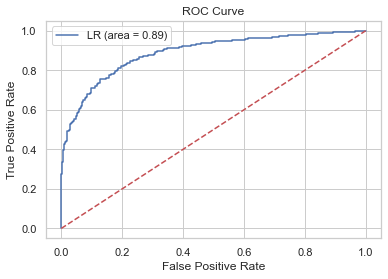

In [174]:
fpr,tpr,threshold = roc_curve(y_validation, y_pred_xgb)
roc_auc = roc_auc_score(y_validation, y_pred_xgb)
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### confusion_matrix

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_validation, xgb_clf.predict(X_validation))

array([[336,  69],
       [ 87, 308]])

### F1 score

In [176]:
from sklearn.metrics import f1_score
evaluation_metric = f1_score

In [177]:
print("Prediction")
pred_train = xgb_clf.predict(X_train)
pred_test = xgb_clf.predict(X_validation)

train_score = evaluation_metric(y_train, pred_train)
test_score = evaluation_metric(y_validation, pred_test)

print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)

Prediction
Train Score : 0.9771
Test Score : 0.7979


### voting
[ensemble voting](https://www.kaggle.com/code/saurabhshahane/voting-classifier/notebook)

```
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(enumerate=[('rfc',gh.isFraud_jh),
                                    ('xgb',gh.isFraud_ge)], voting='soft', n_jobs=2)
voting = voting.fit(train, target)
prediction = voting.predict(test)
submission_df = pd.DataFrame({'TransactionID':gh.TransactionID,'isFraud':gh.isFraud})
```

### 제출

In [178]:
X_test.shape, submission.shape

((506691, 137), (506691, 2))

In [179]:
prediction = xgb_clf.predict_proba(X_test)[:,1]
submission['isFraud'] = 0
submission['isFraud'] = np.round(prediction,4)
submission

,TransactionID,isFraud
0,3663549,0.1923
1,3663550,0.2662
2,3663551,0.6841
3,3663552,0.1030
4,3663553,0.2943
...,...,...
506686,4170235,0.4296
506687,4170236,0.1580
506688,4170237,0.2147
506689,4170238,0.1316


In [92]:
submission_df = pd.DataFrame({'TransactionID':submission.TransactionID
                           ,'isFraud':submission.isFraud})

In [93]:
# 파일 제출
submission_df.reset_index(drop=True).to_csv('sampling_xgbm_submission.csv', index=False)

# hyper-parameter tuning

In [180]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


space={
    'max_depth': hp.choice('max_depth', np.arange(1, 20, dtype=int)),
    'gamma': hp.uniform('gamma', 1,9),
    'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': 500,
    'seed': 0
    }

In [181]:
from sklearn.metrics import roc_auc_score

def objective(space):
    
    clf=xgb.XGBClassifier(
        n_estimators =space['n_estimators'], 
        max_depth = space['max_depth'],
        gamma = space['gamma'],
        reg_alpha = space['reg_alpha'],
        min_child_weight= space['min_child_weight'],
        colsample_bytree= space['colsample_bytree'],
        objective= 'binary:logistic')
    
    evaluation = [
#         ( X_train, y_train), 
        ( X_validation, y_validation)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, 
            eval_metric="auc",
            early_stopping_rounds=10,
            verbose=False)
    
    evaluation_metric = roc_auc_score
    pred = clf.predict_proba(X_validation)[:,1]
    roc = evaluation_metric(y_validation, pred > 0.5)
    print ("SCORE:", roc)
    return roc
#     return {'loss': -roc, 'status': STATUS_OK }

In [182]:
objective(space)

SCORE: 0.7918424753867792


0.7918424753867792

In [183]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                          
0.7770589154555398                                                              
SCORE:                                                                          
0.7786997968432569                                                              
SCORE:                                                                          
0.7683544303797469                                                              
SCORE:                                                                          
0.7796218159087358                                                              
SCORE:                                                                          
0.7721206438506016                                                              
SCORE:                                                                          
0.7707610564150648                                                              
SCORE:                      

In [184]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7204425639327261, 'gamma': 7.880125833405017, 'max_depth': 0, 'min_child_weight': 6.0, 'reg_alpha': 122.0, 'reg_lambda': 0.8673062508937274}


## 테스트 및 제출 파일 생성

In [96]:
# X_test

In [ ]:
submission = pd.read_csv("sample_submission.csv")
prediction = xgb_clf.predict_proba(X_test)[:,1]
submission['isFraud'] = 0
submission['isFraud'] = np.round(prediction,4)
submission_df = pd.DataFrame({'TransactionID':submission.TransactionID
                           ,'isFraud':submission.isFraud})

In [ ]:
submission

In [ ]:
# 파일 제출
submission.reset_index(drop=True).to_csv(f"xgbm_submission_tuning.csv", index=False)